#                       <h1><center>**TRAINING NEURAL NETWORK**</center></h1>   




# **ABOUT THE MNIST DATASET**

MNIST dataset, a classic in the machine learning community, which has been around almost as long as the field itself and has been intensively studied. 
It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.
The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

![MNIST](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/06/78429blog-5-cover.png)

# **TOPICS IN THIS ASSIGNMENT**
1. Importing and understanding dataset
2. EDA
3. Preparing data
4. Building the model
5. Compiling and fitting the model
6. Prediction on test data
7. Evaluating the model
8. Rebuilding the model(repeating 3-7 steps)

### **How To Load Dataset?**
- Documentation Link - https://www.tensorflow.org/api_docs/python/tf/keras/datasets
- Video link below

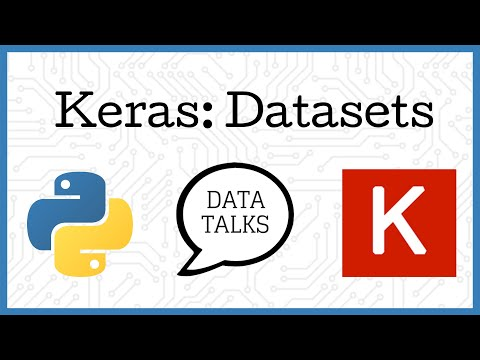

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Vm_wFo4j3So', width=600, height=300)

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
from keras import models,Sequential
import tensorflow as tf

# 1. **Importing & Understanding Data**

In [3]:
# load the data using mnist.load_data and define train_images, train_labels, test_images, test_labelstf.keras.
data = tf.keras.datasets.mnist 
(X_train,y_train),(X_test,y_test) = data.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
# check the shape of train_images dataset
print("shape of training images dataset: ",X_train.shape)
print("Shape of training images target dataset: ",y_train.shape)

shape of training images dataset:  (60000, 28, 28)
Shape of training images target dataset:  (60000,)


In [5]:
# check the shape of train_images single image (train_images[0])
print("shape of single image in training set: ",X_train[0].shape)      

shape of single image in training set:  (28, 28)


In [6]:
# let's look at the first image which will show in the array form 
print("Pixel values of first image in training set: ")
# print(X_train)
for lst in X_train[0]:
    print(lst)

Pixel values of first image in training set: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]
[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
  93  82  82  56  39   0   0   0   0   0]
[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0  80 156 107 253 253 205  11   0  43 154
   0   0   0   0   0   0   0   0   0   0]
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0

**Observation from the array output**
- You can see value in the array ranging from 0-255 depicting RGB color.

In [7]:
# check shape of train_labels
print('shape of target label training set: ',y_train.shape)

shape of target label training set:  (60000,)


In [8]:
# check the labels of train data
print(y_train)

[5 0 4 ... 5 6 8]


In [9]:
# check shape of test data
print("Shape of testing set: ",X_test.shape)

Shape of testing set:  (10000, 28, 28)


In [10]:
# check the labels of test data
print(y_test)

[7 2 1 ... 4 5 6]


## **How to plot an image?**
- You can find a simple way to plot an image of MNIST dataset by watching the video below.

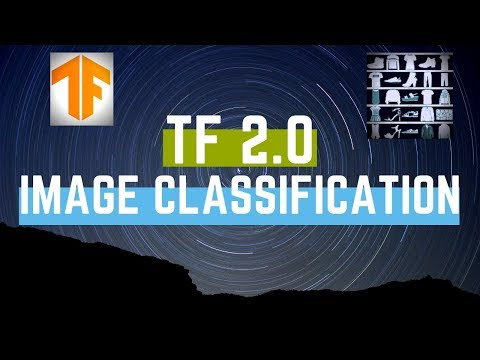

In [11]:
YouTubeVideo('2JhLogJAUGc', width=600, height=300)

# 2. **EDA**

## **How to plot multiple images of the output(0-9 digits)?**
- Follow the comments below in the code to plot.

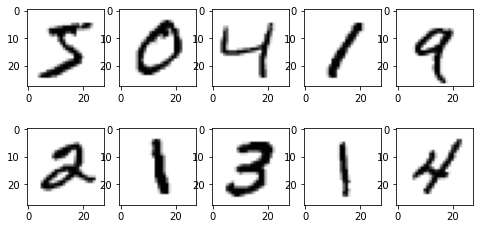

In [12]:
# defining subplots (2,5)
fig, ax = plt.subplots(2,5, figsize=(8,4))

# looping over ax.flatten(), and plotting each digit
for i, ax in enumerate(ax.flatten()): # code instead of None
    # choosing each digit occuring at its first instance
    im_idx = i # code instead of None
    # reshaping the selected digit to (28, 28) from (1, 28, 28)
    plottable_image = X_train[im_idx].reshape(28,28) 
    # now pass this plottable_image to ax.imshow
    ax.imshow(plottable_image, cmap='gray_r')

# 3. **Preparing the data**

## **How to prepare the image for model building?**
- Follow the comments below to understand the process.

In [13]:
# reshape train_images from (60000, 28, 28) to (60000, 28*28)
X_train1 = X_train.reshape(len(X_train),784)
# convert dtype of train_images from uint8 to float32 
X_train1 = X_train1.astype('float32')
# reshape test_images from (10000, 28, 28) to (10000, 28*28)
X_test1 = X_test.reshape(len(X_test),784)
# convert dtype of test_images from uint8 to float32 
X_test1 = X_test1.astype('float32')

In [14]:
# Let us observe the, first image storage of pixel values
print(X_train1[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

* All pixel values of size (28,28) matrix are flattened to a single list of 784 values.

* As the pixel values have lot of variance in the numbers, it is preferred to scale them to between (0 and 1) by process of normalization or standardization.

In [15]:
# Let us scale them with normalization

scaledTrainingImages = X_train1/255 
scaledTestingImages = X_test1/255

# 4.**Model 1: Building the model** 

![](https://zitaoshen.rbind.io/project/machine_learning/how-to-build-your-own-neural-net-from-the-scrach/featured.png)

### **How To Build Model?**
- Documentation Link - https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Watch the video below & follow the steps in code cells later.

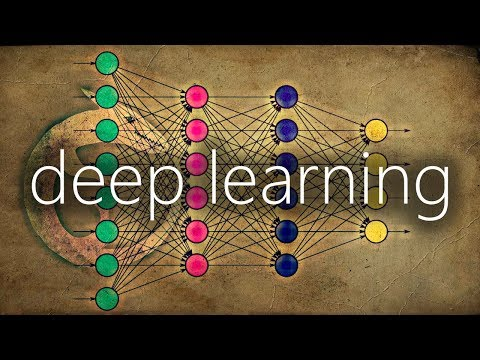

In [16]:
YouTubeVideo('FK77zZxaBoI', width=600, height=300)

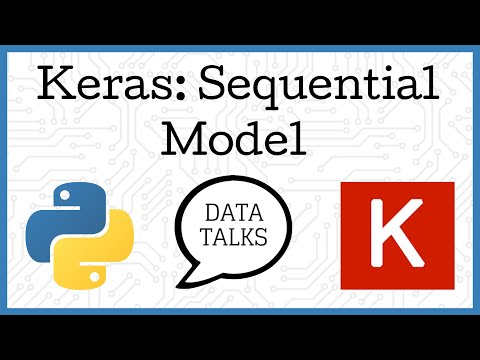

In [17]:
YouTubeVideo('VGCHcgmZu24', width=600, height=300)

**Let's import necessary libraries and define our model by following the comments**

In [18]:
# importing keras and layers from tensorflow


# define the model and its network architecture
# define two dense layers having first layer with 512 neurons & activation='relu'
# second layer with 10 neurons & activation = 'softmax'
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512,input_shape=(784,),activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


2022-12-16 07:00:08.363721: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# 5. **Compiling & fitting the model**

**In the next cell, we will compile our model.**

In [20]:
# compile the model with optimizer='rmsprop', loss='sparse_categorical_crossentropy', & metrics=['accuracy']
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Then we will fit our model**

In [21]:
# fit the model with epochs=10, batch_size=128
model.fit(scaledTrainingImages,y_train,epochs=10,batch_size=128)

2022-12-16 07:00:08.779105: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2559 - accuracy: 0.9251
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1045 - accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0684 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0500 - accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0284 - accuracy: 0.9919
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0220 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0133 - accuracy: 0.9963
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0098 - accuracy: 0.9973

In [22]:
model.layers

In [23]:
# lets get the weights & biases
layer1 = model.layers[0]
layer1

In [24]:
weights,biases = layer1.get_weights()
print("weights used in neural network: ",len(weights))
print("biases used in neural network: ",len(biases))

weights used in neural network:  784
biases used in neural network:  512


* As in first layer, there are 784 as input shape, so 784 weights are randomly assigned.
* And as 512 neurons are there, 512 biases are added (one-one mapping of bias to each neuron)

In [25]:
layer2 = model.layers[1]
layer2

In [26]:
weights2,bias2 = layer2.get_weights()
print("weights used in 2nd layer: ",len(weights2))
print("biases used in 2nd layer: ",len(bias2))

weights used in 2nd layer:  512
biases used in 2nd layer:  10


* As 512 is input shape for 2nd layer, we have 512 weights assigned , one weights to each neuron.
* As 10 is output shape, 10 biases are added.

# 6. **Prediction on test data**

**In the next cell, we will take first 10 images of test data**

In [27]:
# define a variable test_digits and store the first 10 images of test data
test_digits = scaledTestingImages[:10]
print(test_digits)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Then we will predict on those 10 images**

In [34]:
# predict the test_digits using our model
prediction = model.predict(test_digits)

for i in range(10):
    print(prediction[i])
#     print(np.argmax(prediction[i]),end=' ')

[2.0138849e-10 2.1776603e-15 5.5456786e-09 4.5728186e-07 4.6249669e-14
 4.3471237e-11 3.0805479e-20 9.9999940e-01 8.6658583e-11 9.2198114e-08]
[6.7762378e-14 1.9965960e-09 1.0000000e+00 1.2674279e-12 1.7047458e-24
 4.1986842e-10 2.4520880e-12 6.1469289e-22 4.9697633e-12 3.6886496e-21]
[2.1353195e-09 9.9978596e-01 2.2218478e-06 1.0340344e-07 1.8332457e-06
 1.1680623e-06 8.0283189e-07 1.8503846e-05 1.8933794e-04 1.4374688e-08]
[9.9988484e-01 2.0646771e-17 8.3752809e-09 2.9795590e-11 4.5049169e-09
 1.6098906e-09 4.7969825e-05 8.5592717e-07 4.0507641e-12 6.6306777e-05]
[3.4747899e-08 2.3797277e-16 5.8237415e-08 2.9205194e-11 9.8866010e-01
 2.3761959e-11 3.4483211e-08 8.9845613e-05 3.7282982e-07 1.1249611e-02]
[4.4180354e-11 9.9994290e-01 6.1559220e-09 1.6457175e-08 1.1371344e-06
 1.0535540e-09 8.4073259e-10 5.1231989e-05 4.6668461e-06 1.8313829e-09]
[8.6072786e-15 3.0279073e-14 2.0694009e-09 2.2882706e-11 9.9997830e-01
 2.1341593e-08 3.2073352e-12 6.3138870e-08 3.4454774e-06 1.8133092e-05]

**We will check prediction on first image in next cell**

In [36]:
# check the first image prediction from predictions
prediction[0]

array([2.0138849e-10, 2.1776603e-15, 5.5456786e-09, 4.5728186e-07,
       4.6249669e-14, 4.3471237e-11, 3.0805479e-20, 9.9999940e-01,
       8.6658583e-11, 9.2198114e-08], dtype=float32)

**Previous output shows probability of first image being either one of 0-9 digits. For example, probability of first image being 0 is 1.83151341e-10 which is very very low.**

In [38]:
# checking the index having maximum prediction 
np.argmax(prediction[0])

7

**In next cell, we can see the maximum prediction for first image is 0.99 at index 7 showing that first image is digit 7.**

In [40]:
# checking the index value having maximum prediction
prediction[0][7] 

0.9999994

**In next cell, we are confirming whether our prediction is right or wrong by checking label.**

In [41]:
# checking the label for that index having maximum prediction
y_test[0]

7

# 7. **Evaluating the model**

**Now we evaluate our model on unseen data, which is test set.**

In [43]:
# check the loss and accuracy for test data using model.evaluate
acc=model.evaluate(scaledTestingImages,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9822


In [46]:
# print test accuracy
print(f"Accuracy is: {round(acc[1]*100,1)}")

Accuracy is: 98.2


In [47]:
model.save("mnist1.h5")


In [48]:
loaded_model = tf.keras.models.load_model("/kaggle/working/mnist1.h5")

In [52]:
history = loaded_model

In [49]:
loaded_model.evaluate(scaledTestingImages,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9822


[0.06764375418424606, 0.982200026512146]

## **Observation from evaluation**
- We can see that our train accuracy is 99.7% and our test accuracy is 98.2% which clearly shows the case of overfitting. 

In [53]:
import pandas as pd
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

ValueError: DataFrame constructor not properly called!

# **REGULARIZATION**
Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. It is a way to overcome overfitting problem in machine learning/deep learning problem. This in turn improves the model’s performance on the unseen data as well.

**Overfittng:** It is a situation where your model performed exceptionally well on train data but was not able to predict test data. 

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-7.52.01-PM-e1522832332857.png)

## **How do we deal with reglarization?**

There are multiple ways to deal with regularization
- L2 & L1 regularization
- Dropouts
- Early stopping
- Data augmentation

Besides these ways, tweaking the architecture is a natural way to avoid overfitting. Here we just gave you an overview of regularization. We will cover this detail in another assignment.

## **Here we will just tweak our architecture to show you how you can avoid overfitting. This is an excellent way to learn how you can train the network with different architectures.**

# 8. **Model 2: Rebuilding another model**

In [56]:
# build 2nd model 
# architecture: total 3 dense layers, 
# first 2 layers with 128, 128 neurons with activation='relu'
# and last layer with 10 neurons and activation='softmax'
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(128,input_shape=(784,),activation='relu'))
model2.add(tf.keras.layers.Dense(128,activation='relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [57]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [61]:
## First layer
print(128*784+784)
## Second Lyaer 
print(128*128+128)
## Third layer 
print(128*10+10)

101136
16512
1290


In [62]:
# compiling model2 with optimizer='rmsprop', loss='sparse_categorical_crossentropy' and metrics=['accuracy']
model2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
# fitting model 2 with epochs=6, batch_size=128
model2.fit(scaledTrainingImages,y_train,epochs=6,batch_size=128)

Epoch 1/6
469/469 [==============================] - 3s 5ms/step - loss: 0.3046 - accuracy: 0.9130
Epoch 2/6
469/469 [==============================] - 2s 5ms/step - loss: 0.1231 - accuracy: 0.9633
Epoch 3/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0839 - accuracy: 0.9745
Epoch 4/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0631 - accuracy: 0.9808
Epoch 5/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 6/6
469/469 [==============================] - 2s 5ms/step - loss: 0.0410 - accuracy: 0.9871


In [67]:
# check the loss and accuracy for test data using model2.evaluate
acc=model2.evaluate(scaledTestingImages,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9789


In [72]:
print("Accuracy: ")
print(round(acc[1]*100))


Accuracy: 
98


## **Observation from evaluation**
- We can see the gap between train accuracy & test accuracy falling down from 1.5% in our first model to 0.9% this time. Overfitting is still a problem so we will do some more changes in our architecture. 

# 9. **Model 3: Rebuilding another model**

In [73]:
# Build 3rd model
# add 3 dense layers in which 
# first 2 layers with 64 neurons and activation = 'relu'
# last layer with 10 neurons and activation='softmax'
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(64,input_shape=(784,),activation='relu'))
model3.add(tf.keras.layers.Dense(64,activation='relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [79]:
## (InputShape * kernels) + kernels
# First layer
print(784*64+64)
# Second layer
print(64*64+64)
# Third layer 
print(64*10+10)

50240
4160
650


In [80]:
# compiling model3 with optimizer='rmsprop', loss='sparse_categorical_crossentropy' and metrics=['accuracy']
model3.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy']
        )

In [82]:
# fitting the model 3 with epochs = 5 and batch_size=128
model3.fit(scaledTrainingImages,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.3733 - accuracy: 0.8961
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1706 - accuracy: 0.9496
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1236 - accuracy: 0.9635
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0985 - accuracy: 0.9705
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0807 - accuracy: 0.9758


In [83]:
# check the loss and accuracy for test data using model3.evaluate
model3.evaluate(scaledTestingImages,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9694


[0.10332818329334259, 0.9693999886512756]

## **Observation from evaluation**
- We can see the gap between train accuracy & test accuracy falling down from 0.9% in our 2nd model to 0.5% this time. Let's try to reduce this gap also.

# 10. **Model 4: Rebuilding another model**

In [89]:
# Build 4th model
# add 2 dense layers in which 
# first layer with 128 neurons and activation = 'relu'
# last layer with 10 neurons and activation='softmax'
model4 =  tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(128,input_shape=(784,),activation='relu'))
model4.add(tf.keras.layers.Dense(10,activation='softmax'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [91]:
# First layer
print(784*128+128)
# secondlayer 
print(128*10+10)

100480
1290


In [92]:
# compiling model4 with optimizer='rmsprop', loss='sparse_categorical_crossentropy' and metrics=['accuracy']
model4.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [94]:
# fitting the model 4th with epochs = 5 and batch_size=128
model4.fit(scaledTrainingImages,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3291 - accuracy: 0.9087
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1593 - accuracy: 0.9531
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1132 - accuracy: 0.9667
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0886 - accuracy: 0.9748
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0724 - accuracy: 0.9785


In [95]:
# check the loss and accuracy for test data using model4.evaluate
model4.evaluate(scaledTestingImages,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9736


[0.0866621732711792, 0.9735999703407288]

## **Observation from evaluation**
- We can see the gap between train accuracy & test accuracy falling down from 0.5% in our fourth model to 0.4% this time. You can also try different architecture and play with it to see how it works. Learn from such insights.

# **CONCLUSION FROM THIS ASSIGNMENT**
- We saw that how model complexity i.e. no. of layers and neurons affect our model.
- Increasing no. of neurons/layers can make our model overfit the data.  

# **IT'S TIME FOR FEEDBACK GUYS......PLEASE FILL THE FORM AND HELP US TO IMPROVE**

https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s